#### Motivation for RFC - to address inadequacies in previous models
* boosting/bagging can be donel RFC is a type of bagging tehnique
* ensemble method -> better? why? 

In [1]:
# import libraries to facilitate calculations and data prep
import os
import math
import pandas as pd
import numpy as np

In [2]:
# load the same pre-processed data

trainX_path = "./trainX.csv"
trainY_path = "./trainY.csv" 
testX_path = "./testX.csv" 
testY_path = "./testY.csv" 

df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)
df_testX = pd.read_csv(testX_path)
df_testY = pd.read_csv(testY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

In [3]:
# import libraries needed to perform scaling and learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# import libraries to evaluate models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [4]:
def evaluate(model, x_train, x_test, y_train, y_test):

    # function takes the regressor, x_train, and y_train, train model
    model.fit(X=x_train,y=y_train)
    # define variables to hold the predicted values
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    
    # Evaluate and print metrics
    metrics = [f'{precision_score(y_test, y_hat_test):.2f}', 
               f'{recall_score(y_test, y_hat_test):.2f}',
               f'{f1_score(y_test, y_hat_test):.2f}',
               f'{accuracy_score(y_test, y_hat_test):.2f}']
    
    return metrics

#### RFC is a superior model compared to SVM
* each training and prediction took <1min, compared to mins using svm
* higher f1 score and accuracy than SVM (f1, 0.82 vs 0.79; accuracy 0.96 vs 94) 
* equally outlier-robust; outlier was included in the dataset
* applying class-weights is very important - f1 score of 0 otherwise

In [5]:
import time
start_time = time.time()

# define models for training
models = [RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=50, 
                             bootstrap = True
                                ),
          RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=50, 
                             class_weight='balanced', 
                             bootstrap = True
                                )]
          
# transform data for training; libraries should have been imported in previous cells  
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
trainX_data = [trainX, std_scaler.fit_transform(trainX), min_max_scaler.fit_transform(trainX)]              
testX_data = [testX, std_scaler.transform(testX), min_max_scaler.transform(testX)]

    
# initiate with an empty list to store metrics
ls =[]

for model in models:
    for i in range(0,len(trainX_data)):
        ls.append(evaluate(model=model, 
                           x_train = trainX_data[i], x_test = testX_data[i],
                           y_train = trainY, y_test = testY))

# convert ls to df        
df = pd.DataFrame(ls, columns = ['precision','recall','f1','acc'])
df

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1,acc
0,0.00,0.00,0.00,0.88
1,0.00,0.00,0.00,0.88
2,0.00,0.00,0.00,0.88
3,0.65,0.94,0.77,0.93
4,0.76,0.88,0.82,0.95
5,0.65,0.94,0.77,0.93


              precision    recall  f1-score   support

           n       0.98      0.98      0.98      7984
           y       0.82      0.85      0.84      1058

    accuracy                           0.96      9042
   macro avg       0.90      0.91      0.91      9042
weighted avg       0.96      0.96      0.96      9042



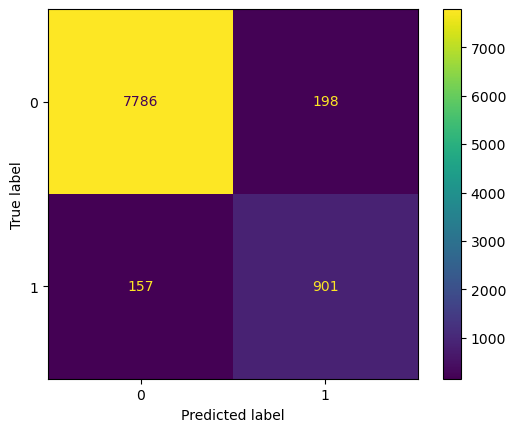

In [30]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=50, 
                             class_weight='balanced', 
                             bootstrap = True)
model.fit(trainX,trainY)
y_hat_train = model.predict(trainX)
y_hat_test = model.predict(testX)

cm = confusion_matrix(testY, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(testY, y_hat_test, target_names=['n','y']))

#### search for the optimal depth
* `class_weight = 'balanced'` and no scaling
* ideal max depth from 10 onwards

2.10 min


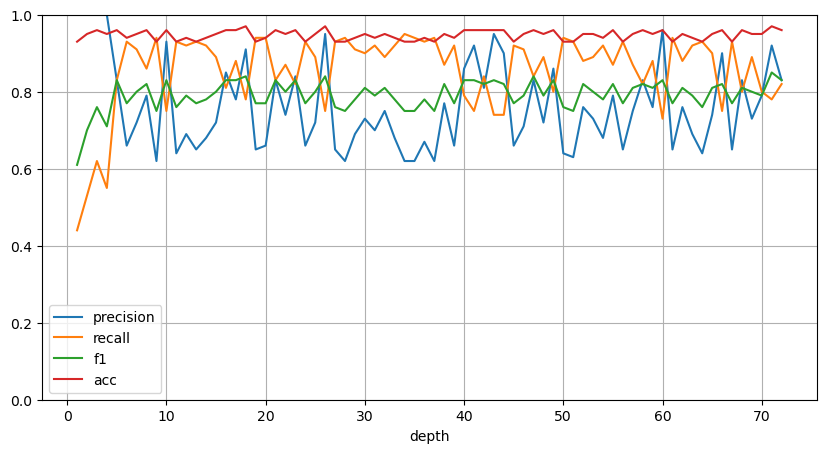

In [6]:
# load the same pre-processed data

trainX_path = "./trainX.csv"
trainY_path = "./trainY.csv" 
testX_path = "./testX.csv" 
testY_path = "./testY.csv" 

df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)
df_testX = pd.read_csv(testX_path)
df_testY = pd.read_csv(testY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

ls = []
start_time = time.time()
for depth in range(1,73):
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, max_leaf_nodes=50, 
                             class_weight='balanced', bootstrap = True)
    ls.append(evaluate(model=model,
                       x_train = trainX, x_test = testX,
                       y_train = trainY, y_test = testY))

print(f'{((time.time()-start_time)/60):.2f}','min')

df = pd.DataFrame(ls, columns = ['precision','recall','f1','acc'])
df.insert(0,'depth', list(range(1,73)))    

# df elements at this point are objects; need to convert to float to be plotted
df = df.astype(float)

import matplotlib.pyplot as plt
ax = df.plot.line(x='depth', y=['precision','recall','f1','acc'],
             figsize=(10, 5), grid=True)
ax.set_ylim(0,1)
plt.show()

### Other methods explored

#### Gradient Tree Boosting for Classification
* superior performance, optimal max depth = 20

6.39 min


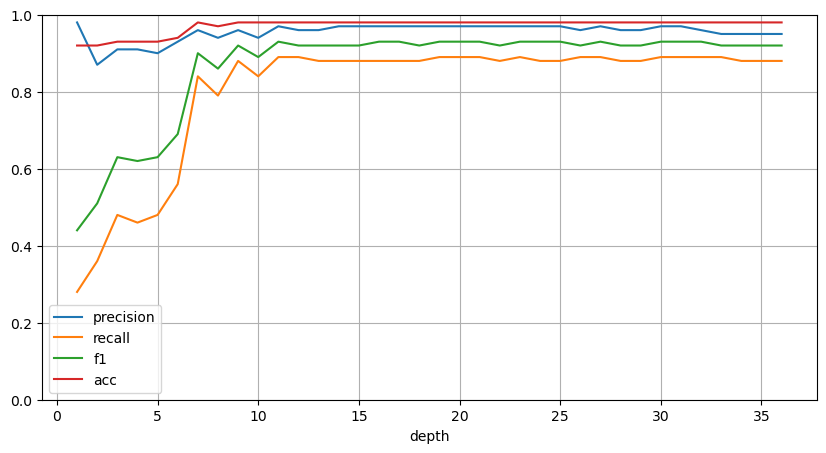

In [8]:
# load the same pre-processed data

trainX_path = "./trainX.csv"
trainY_path = "./trainY.csv" 
testX_path = "./testX.csv" 
testY_path = "./testY.csv" 

df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)
df_testX = pd.read_csv(testX_path)
df_testY = pd.read_csv(testY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

from sklearn.ensemble import GradientBoostingClassifier

ls = []
start_time = time.time()
for depth in range(1,37):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=depth, random_state=73)
    ls.append(evaluate(model=model,
                       x_train = trainX, x_test = testX,
                       y_train = trainY, y_test = testY))

print(f'{((time.time()-start_time)/60):.2f}','min')

df = pd.DataFrame(ls, columns = ['precision','recall','f1','acc'])
df.insert(0,'depth', list(range(1,37)))    

# df elements at this point are objects; need to convert to float to be plotted
df = df.astype(float)

import matplotlib.pyplot as plt
ax = df.plot.line(x='depth', y=['precision','recall','f1','acc'],
             figsize=(10, 5), grid=True)
ax.set_ylim(0,1)
plt.show()

#### feature importance to guide future data collection
* optimal max depth = 20
* top 5 important features = duration, balance, age, day, poutcome 

              precision    recall  f1-score   support

           n       0.98      0.99      0.99      7984
           y       0.95      0.88      0.92      1058

    accuracy                           0.98      9042
   macro avg       0.97      0.94      0.95      9042
weighted avg       0.98      0.98      0.98      9042



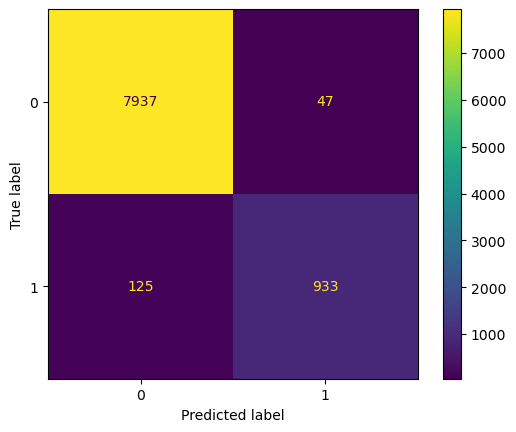

In [9]:
model = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0,max_depth=depth, random_state=73)
model.fit(trainX,trainY)
y_hat_train = model.predict(trainX)
y_hat_test = model.predict(testX)

cm = confusion_matrix(testY, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(testY, y_hat_test, target_names=['n','y']))

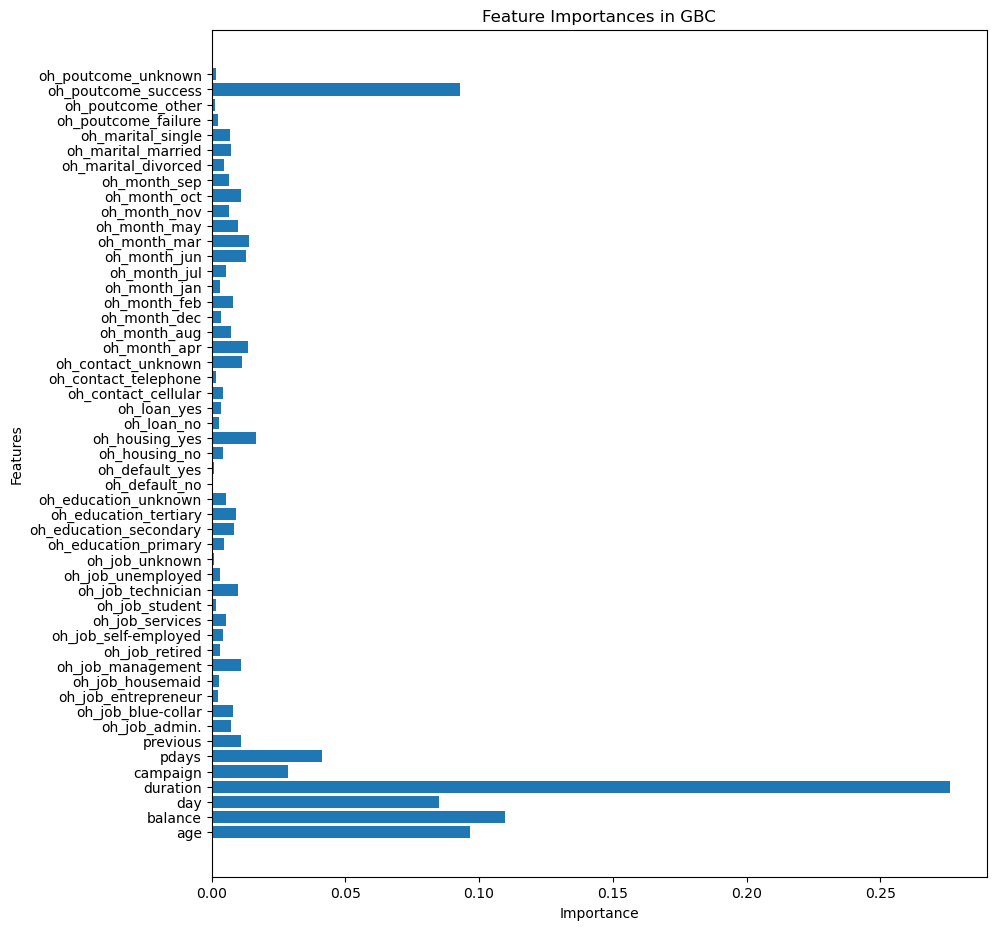

In [10]:
ls_importances_ = (model.feature_importances_).tolist()
ls_colnames = list(df_trainX)


import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
ls_importances_ = (model.feature_importances_).tolist()
ls_colnames = list(df_trainX)
  
fig = plt.figure(figsize = (10, 11))
 
# creating the bar plot
plt.barh(ls_colnames, ls_importances_,)
 
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances in GBC")
plt.show()

#### repeat with reduced dataset resulted in much worse performance


3.80 min


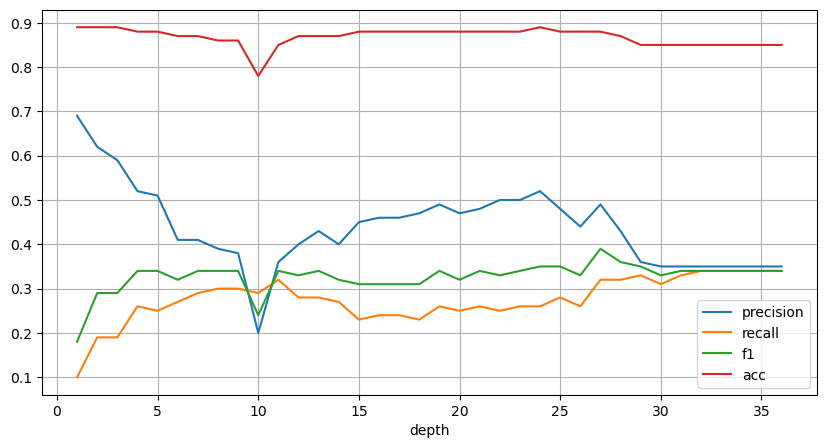

In [15]:
# load reduced dataset with top 5 important features

trainX_path = "./trainX_top5.csv"
trainY_path = "./trainY_top5.csv" 
testX_path = "./testX_top5.csv" 
testY_path = "./testY_top5.csv" 

df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)
df_testX = pd.read_csv(testX_path)
df_testY = pd.read_csv(testY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

from sklearn.ensemble import GradientBoostingClassifier

ls = []
start_time = time.time()
for depth in range(1,37):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=depth, random_state=73)
    ls.append(evaluate(model=model,
                       x_train = trainX, x_test = testX,
                       y_train = trainY, y_test = testY))

print(f'{((time.time()-start_time)/60):.2f}','min')

df = pd.DataFrame(ls, columns = ['precision','recall','f1','acc'])
df.insert(0,'depth', list(range(1,37)))    

# df elements at this point are objects; need to convert to float to be plotted
df = df.astype(float)

import matplotlib.pyplot as plt
ax = df.plot.line(x='depth', y=['precision','recall','f1','acc'],
             figsize=(10, 5), grid=True)
# ax.set_ylim(0,1)
plt.show()

#### perfect prediction using 5 predictors

              precision    recall  f1-score   support

           n       0.91      0.92      0.91      7984
           y       0.35      0.34      0.34      1058

    accuracy                           0.85      9042
   macro avg       0.63      0.63      0.63      9042
weighted avg       0.85      0.85      0.85      9042



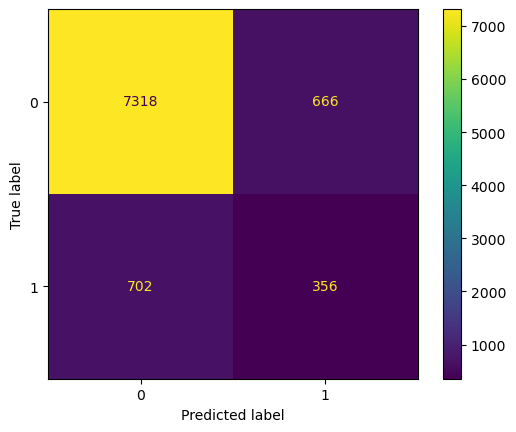

In [16]:
model = GradientBoostingClassifier(n_estimators=30, learning_rate=1.0,max_depth=depth, random_state=73)
model.fit(trainX,trainY)
y_hat_train = model.predict(trainX)
y_hat_test = model.predict(testX)

cm = confusion_matrix(testY, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(testY, y_hat_test, target_names=['n','y']))

#### re-visiting other models with reducted dataset; does not work on all models

#### no improvement with LogR

              precision    recall  f1-score   support

           n       0.95      0.84      0.89     31937
           y       0.34      0.64      0.44      4231

    accuracy                           0.81     36168
   macro avg       0.64      0.74      0.67     36168
weighted avg       0.88      0.81      0.84     36168



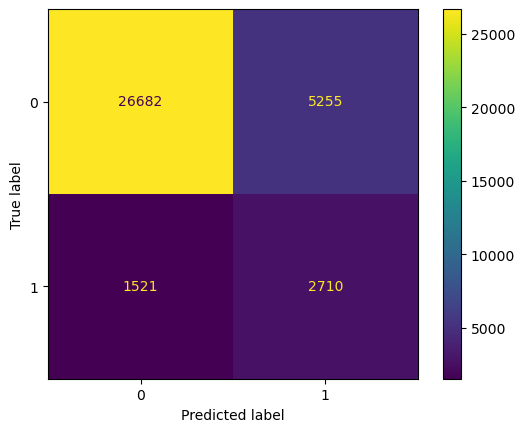

In [61]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1e5, class_weight = 'balanced')
regressor.fit(trainX,trainY)
y_hat_train = regressor.predict(trainX)
y_hat_test = regressor.predict(testX)

cm = confusion_matrix(testY, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(testY, y_hat_test, target_names=['n','y']))

#### SVM

In [62]:
import time

# import libraries needed to perform learning vis SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

# import libraries to evaluate models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# convert df to array for model
x_train = np.array(trainX)
y_train = np.array(trainY)
x_test = np.array(testX)
y_test = np.array(testY)

start_time = time.time()
# perform fitting on original normalized data 
    # from LogR experience, cannot predict impact of scaling
    # from LogR, balancing was shown to be important regardless of scaling
clf = make_pipeline(SVC(class_weight='balanced',verbose=True))
clf_std = make_pipeline(StandardScaler(), SVC(class_weight='balanced',verbose=True))
clf_MinMax = make_pipeline(MinMaxScaler(), SVC(class_weight='balanced',verbose=True))

clf.fit(x_train, y_train)
clf_MinMax.fit(x_train, y_train)
clf_std.fit(x_train, y_train)

end_time = time.time()
print(f'{(end_time-start_time):.2f}')

[LibSVM]...........................
*.
*.
*.
*
optimization finished, #iter = 29115
obj = -24461.469620, rho = -1.427224
nSV = 24877, nBSV = 21836
Total nSV = 24877
[LibSVM]........................
*..
*.
*
optimization finished, #iter = 27265
obj = -19933.985667, rho = 0.529700
nSV = 20434, nBSV = 17508
Total nSV = 20434
[LibSVM]...........................
*...........*.
*
optimization finished, #iter = 39342
obj = -17878.834379, rho = 0.248944
nSV = 18450, nBSV = 15797
Total nSV = 18450
62.36


In [63]:
def evaluate_svm(model, x_train, x_test, y_train, y_test):
    # define variables to hold the predicted values
    # models need to be trained outside of the function
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    
    # Evaluate and print metrics
    metrics = [f'{precision_score(y_test, y_hat_test):.2f}', 
               f'{recall_score(y_test, y_hat_test):.2f}',
               f'{f1_score(y_test, y_hat_test):.2f}',
               f'{accuracy_score(y_test, y_hat_test):.2f}']
    
    print(metrics)

In [64]:
start_time = time.time()

models = [clf, clf_std, clf_MinMax]
for model in models:
    evaluate_svm(model,
         x_train = x_train, x_test = x_test,
         y_train = y_train, y_test = y_test)
    end_time = time.time()
    print(f'{(end_time-start_time):.2f}')

['0.26', '0.65', '0.38', '0.75']
70.76
['0.33', '0.76', '0.46', '0.79']
127.44
['0.36', '0.70', '0.47', '0.82']
191.83


#### Adaboost

In [ ]:
# load the same pre-processed data

trainX_path = "./trainX.csv"
trainY_path = "./trainY.csv" 
testX_path = "./testX.csv" 
testY_path = "./testY.csv" 

df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)
df_testX = pd.read_csv(testX_path)
df_testY = pd.read_csv(testY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
for n in range(1000,5000,100):
    model = AdaBoostClassifier(n_estimators=n) 
    ls.append(evaluate(model=model,
                       x_train = trainX, x_test = testX,
                       y_train = trainY, y_test = testY))

print(f'{((time.time()-start_time)/60):.2f}','min')

df = pd.DataFrame(ls, columns = ['precision','recall','f1','acc'])
df.insert(0,'n_estimator', list(range(1000,5000,100)))    

# df elements at this point are objects; need to convert to float to be plotted
df = df.astype(float)

import matplotlib.pyplot as plt
df.plot.line(x='n_estimator', y=['precision','recall','f1','acc'],
             figsize=(10, 5), grid=True)
plt.show()
print(f'{((time.time()-start_time)/60):.2f}','min')